# Introduction to Bag of Words for Binary Classification

### Motivation: In this problem we provide an introduction to a real world application of the Bag of Words Model: sentiment analysis and binary classification. The student will perform binary classification on two datasets: one Yelp Review dataset partitioned by low and highly rated reviews and another dataset of Airplane Tweets classified into positive and negative sentiment. The student starts off with data exploration. Afterwards, they create a simple logistic regression model with the only feature being word count, then implement bag of words features, then explore a number of modifications to the model in order to evaluate the tangible impact of using different variations and better understand the nuances of the model.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn
import json

from collections import Counter



## 1. Exploring the data set
Here we explore the dataset of Yelp Reviews and Airplane Tweets. The Yelp dataset has a star rating of 1 to 5, so we extract the most polar reviews with 1 and 5 stars and classify them as -1 and 1 respectively. For Airplane Tweets, we translate the 'negative' and 'positive' sentiment labels into classes of -1 and 1. We initially load the data and do some exploratory analysis in order to learn more about the data we will be classifying and gain some insight into how to do so.

In [4]:
### Uncomment to use Yelp Reviews dataset
df = pd.read_csv('yelp_academic_dataset_review.csv') 
###

### Uncomment this to use the Airplane Tweets dataset
# df = pd.read_csv('Tweets.csv') 
###

We simply grab all the one star and five star data from the dataset here. 

In [113]:

### Uncomment to use Yelp Reviews dataset
# Get one star reviews and label them with -1
dfNegative = df[df['stars'] == 1]
dfNegative = dfNegative.head(10000)
dfNegative['stars'] = dfNegative['stars'].apply(lambda x: -1)

# Get five star reviews and label them with 1
print("Shape of the negative input: ")
print(dfNegative.shape)
dfPositive = df[df['stars'] == 5]
dfPositive = dfPositive.head(10000)
dfPositive['stars'] = dfPositive['stars'].apply(lambda x: 1)

print("Shape of the positive input: ")
print(dfPositive.shape)
dfCombined = pd.concat([dfNegative, dfPositive], axis=0)
dfCombined = dfCombined[['stars', 'text']]
dfCombined=dfCombined.rename(columns = {'stars':'class'})
###


### Uncomment this to use the Airplane Tweets dataset
# dfCombined = df[['airline_sentiment', 'text']]
# dfCombined = dfCombined[dfCombined.airline_sentiment != 'neutral']
# dfCombined['airline_sentiment'] = dfCombined['airline_sentiment'].replace(['positive','negative'],[1, -1])
# dfCombined = dfCombined.rename(columns = {'airline_sentiment':'class'})
# dfPositive = dfCombined[dfCombined['class'] == 1]
# dfNegative = dfCombined[dfCombined['class'] == -1]
# print("Shape of the negative input: ")
# print(dfNegative.shape)
# print("Shape of the positive input: ")
# print(dfPositive.shape)
###



# Randomly shuffling the data then dividing it into train and test sets
dfCombined = dfCombined.sample(frac=1)
print("Shape of the dataframe: ")
print(dfCombined.shape)

dfTrainset = dfCombined.head(int(len(dfCombined.index) * .8))
dfTestset = dfCombined.tail(int(len(dfCombined.index) * .2))

trainX = np.asarray(dfTrainset['text'])
trainY = np.asarray(dfTrainset['class'])

testX = np.asarray(dfTestset['text'])
testY = np.asarray(dfTestset['class'])

print('Data Frame of reviews:')


dfCombined

Shape of the negative input: 
(10000, 9)
Shape of the positive input: 
(10000, 9)
Shape of the dataframe: 
(20000, 2)
Data Frame of reviews:


,class,text
21778,1,I struggled to pick between the 2 brazillian s...
9317,1,Upon arriving we were greeted by an enthusiast...
58457,-1,I have rented a car from these guys 3 times in...
8956,1,"This guys awesome. Shows up quickly, 24hours a..."
23848,-1,"If this place was in the south, it would be ou..."
68173,-1,Bennett Property Management is awful. Working ...
43259,-1,The good: I read some reviews that the cutlets...
37680,-1,Just not the same place it use to be since 200...
5177,1,Lazeez was absolutely fantastic! We had the gy...
9151,1,I seriously LOVED this place!\n\nWe started wi...


### Part A: Data Sampling

Try to run the below block multiple times to see different reviews and their respective class. Please comment below on what interesting aspects of the reviews you find associated with each class. What distinguishes between a classification of 1 and one of -1? Do so for both datasets.

In [137]:
sample = dfTrainset.sample() 
print("Text: " + sample['text'].values[0]  + "\n")
print("Classification: " + str(sample['class'].values[0]))

Text: Orlando was very helpful and I was there a couple of times and he was very patient, I had trouble making up my mind what to order.  They have quality products and good customer service for all other people that work there.  I'm very happy with the pavers I bought for my patio re-do.

Classification: 1


#### RESPONSE: 

<p style="color:blue"> Yelp Reviews: Reviews classified as negative have words such as 'rude', 'poor', 'avoid', and other words with negative implications. Additionally, even words like 'waiter' tend to show up in negative reviews because they generally mention things the waitter did wrong. On the other hand, reviews classified as positive contained words like 'nice', 'bomb', and 'helpful'. However, length doesn' seem to be as good an indicator as in the Airplane Tweets dataset.
   <br><br>
Airplane Tweets: Negative tweets seem to have a higher likelihood of having words with negative connotation like 'not' and 'worst,' as well as more punctuation such as quotation marks. They also seem to have a longer length on average. Positive tweets on the other hand have words like 'great' and even ':)' as well as tending to be shorter and having more exclamation marks.
<br><br>
Any meaningful answer that discusses words that are more commonly used in positive reviews vs
negative reviews or length analysis will suffice
</p>

### Part B: Corpus Examination

We will now look at all the text in our train dataset (corpus) in order to see what it contains. In the provided space below use a histogram to visualize the frequency of the 25 most common words. Then answer the questions that follow. Hint: The most_common function for Counters may come in handy.

In [115]:
allText = ' '.join(dfTrainset["text"])
words = allText.split() 

wordCounts = Counter()
for word in words:
    wordCounts[word] += 1


Length of all text:
9326061
Number of unique words:
87831


<BarContainer object of 25 artists>

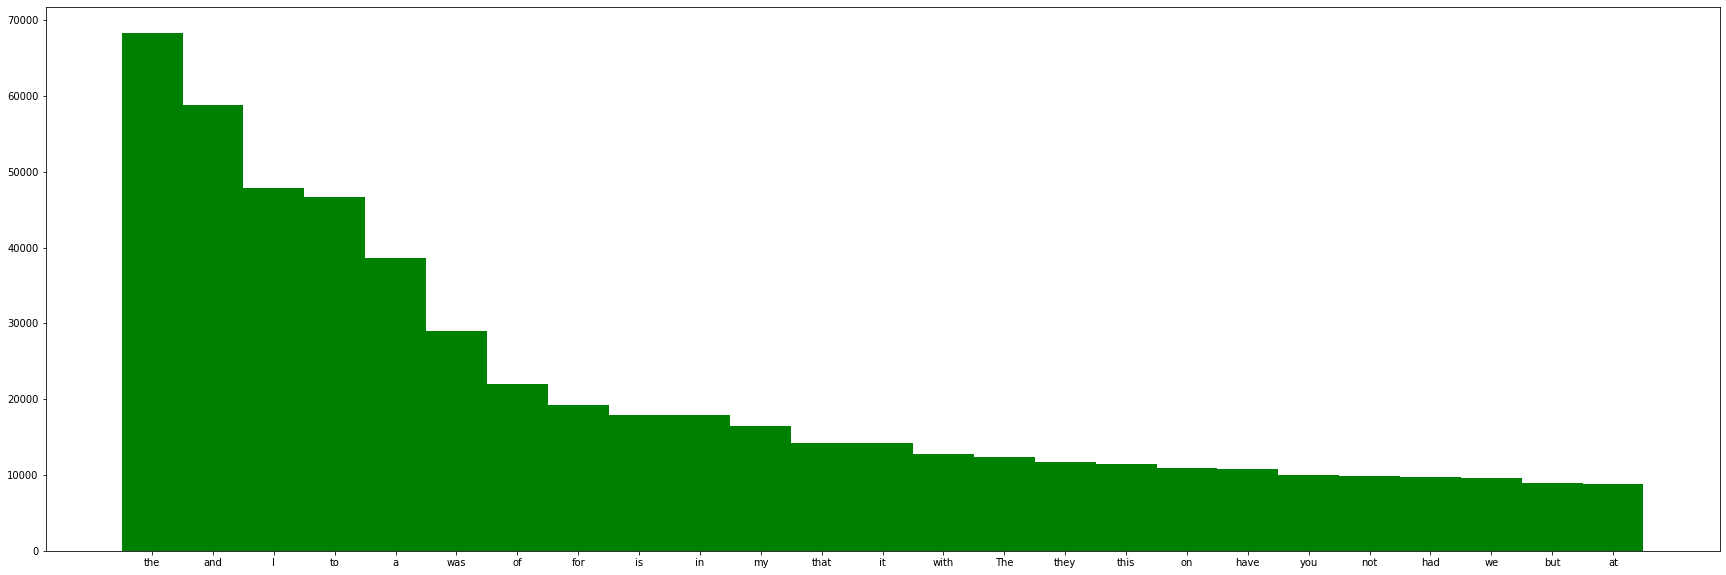

In [116]:
print("Length of all text:")
print(len(allText))
print("Number of unique words:")
print(len(wordCounts))

mostCommon = dict(wordCounts.most_common(25))

fig, ax = plt.subplots(figsize=(30,10))
ax.bar(mostCommon.keys(), mostCommon.values(), 1, color='g')

#### What do you notice about the most common words for both datasets? Do you think they are useful in classifying a review?

#### RESPONSE: 

<p style="color:blue">
The most common words for both datasets seem to mainly contain stop words like 'the', 'is', 'and', and 'a'. The Twitter dataset also has '@united' and '@AmericanAirlines' as well as other corporations in its most common words. This makes sense as they are responding to those companies. These words do not seem to be a large predictor of class as they are probably widely used in both negative and positive reviews, as they are common in normal English speak and Tweets.
</p>

Look at some of the least common words below. Define the variable least common.

In [117]:
### Begin Part B
leastCommon = dict(wordCounts.most_common()[:-10-1:-1])
### End Part B

In [118]:
print(leastCommon)

{'Strip.....wrong!).': 1, '(grissly': 1, "flavor's": 1, 'chicken".': 1, 'Infortunetly': 1, 'faces!': 1, 'converter.': 1, 'pegs': 1, 'u.s.': 1, 'marginal.': 1}


#### What do you notice about the least common words for both datasets? Do you think they are useful in classifying a review?

#### RESPONSE: 

<p style="color:blue">
The least common words for both datasets seem to mainly be gibberish and badly spelled or formatted words such as 'KTA', 'grissly', and '1-2888155964'. There are also many other words that are just as common with the same number of appearances: 1. These words do not seem useful in classifying a review because they are unlikely to show up again. Moreover, it may take away from other words in training by getting assigned a high magnitude weight in its lone appearance even if it will likely not show up again.
</p>

### Part C: Identifying Unique Most Common Words of Each Classification

We now want to find the most common words in each class that are not included in the other. Basically, we find the most common words in positive reviews (class = 1) that are not in the most common set of words for negative reviews (class = -1) and vice versa. Fill out the below code and answer the following questions.

In [119]:
allTextPositive = ' '.join(dfPositive["text"])
wordsPositive = allTextPositive.split() 

### Begin Part C
# Find the 100 most common words that are found in the five star reviews
wordCountsPositive = Counter()
for word in wordsPositive:
    wordCountsPositive[word] += 1
    
mostCommonPositive = dict(wordCountsPositive.most_common(100))
### End Part C



allTextNegative = ' '.join(dfNegative["text"])
wordsNegative = allTextNegative.split() 

### Begin Part C
# Find the 100 most common words that are found in the one star reviews
wordCountsNegative = Counter()
for word in wordsNegative:
    wordCountsNegative[word] += 1
mostCommonNegative = dict(wordCountsNegative.most_common(100))
### End Part C

### Begin Part C
# Subtract sets in order to find the most common unique words for each set
positiveUnique = { k : mostCommonPositive[k] for k in set(mostCommonPositive) - set(mostCommonNegative) }
negativeUnique = { k : mostCommonNegative[k] for k in set(mostCommonNegative) - set(mostCommonPositive) }
### End Part C

print("Most common words in negative reviews: ")
print(negativeUnique)
print()
print("Most common words in positive reviews: ")
print(positiveUnique)

Most common words in negative reviews: 
{'then': 2142, 'said': 3075, 'order': 2016, 'did': 2248, 'could': 2290, 'ordered': 1768, 'came': 2090, 'no': 3909, 'told': 3140, 'went': 2080, "didn't": 2615, 'customer': 1774, 'after': 2387, 'her': 2675, 'over': 2152, 'going': 1762, 'she': 3961, 'who': 1849, 'never': 2886, "don't": 2405, 'asked': 2314, 'minutes': 1854}

Most common words in positive reviews: 
{'also': 1553, 'love': 1544, 'best': 1774, 'staff': 1198, 'some': 1460, 'great': 3288, 'recommend': 1257, '-': 1372, 'friendly': 1167, 'Great': 1211, 'has': 1425, "it's": 1247, 'made': 1148, 'always': 1721, 'can': 1671, 'come': 1071, 'really': 1749, 'nice': 1136, "I've": 1590, 'definitely': 1342, 'than': 1038, "I'm": 1184}


#### What do you notice about these words above? Are they more respresentative of each classification? What words do you think are good indicators of each review class? What words are not so good? Answer for both datasets.

#### RESPONSE: 

<p style="color:blue">
Yelp Reviews: The most common words in negative reviews not in the positive reviews include 'asked', 'ordered', 'didn't', and 'customer'. This is because negative reviews tend to describe very specific situation where something goes wrong, as well as other negative words like 'never' and 'didn't'. The most common words in positive reviews include words such as 'love', 'best', and 'recommend', which all clearly demonstrate positive senttiment. So these words overall seem to be good indicators for each class, as opposed to the words we saw before. They also show up very often in reviews so will be good at predicting class. 
<br><br>
Airplane Tweets: Some words that appear often in negative tweets but are not in the most often list for positive ttweets are 'how' and 'why'. This makes sense as a lot of complaints involve asking questions about something that went wrong. Other words in tthis set are 'Late', 'delayed', and 'Cancelled', which makes sense as these are negative words that would imply dissatisfaction and a negative response. On the other hand, some words that appear in the most common list for positive tweets but not negative are 'thanks', 'love', 'best', and so on. Again, these words make sense as they have a positive connotation and thus would appear more often in positive sentiment tweets. As a result, these words seem to be good indicators of negative/positive sentiment as they appear more often in their respective classes, and thus should be weighted as such in our model. On the other hand, stop words and words that do not appear often as above would no be great predictors of class.
</p>

## 2. Constructing and Evaluating Different Models

### Part D: Baseline Model

To see the effect of the bag of words model, we first build a naive baseline model that tries to simply classification of the model purely based on the length of the review. Complete the code below and answer the following questions.

In [16]:
def baseline_featurize(review):
    ### Begin Part D
    # Featurize the data based on the length of the review. Hint: The feature vector should only have length 1.
    return np.asarray([len(review)])
    ### End Part D

def trainModel(X_featurized, y_true):
    ### Begin Part D
    # Return a trained logistic regression model that can best predict y_true based on X_featurized
    # We use the LogisticRegression Model we imported from scikit-learn to do so
    model = LogisticRegression()
    model.fit(X_featurized, y_true)
    return model
    ### End Part D

def accuracyData(model, X_featurized, y_true):
    ### Begin Part D
    # Predict the data given the model and corresponding data. Return the accuracy 
    # as the percentage of values that were correctly classified. Also print a confusion
    # matrix to help visualize the error. Hint: Look at sklearn.metrics.confusion
    y_predict = model.predict(X_featurized)
    total_num = len(y_true)
    total_correct = np.sum([1 if y_predict[i] == y_true[i] else 0 for i in range(len(y_predict))])
    total_incorrect = total_num - total_correct
    accuracy = total_correct / total_num
    print(sklearn.metrics.confusion_matrix(y_true, y_predict, labels=[-1, 1]))
    print(accuracy)
    ### End Part D
    return accuracy
    

In [121]:
### Begin Part D
# Featurize the training data and then train a model on it. 
# Afterwards, featurize the test data and evaluate the model on it.
# Use the functions you made above to do so
print("Beginning Train Featurization")
featurized_data = np.array(list(map(baseline_featurize, trainX)))
print("Beginning Training")
model = trainModel(featurized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturized_data = np.array(list(map(baseline_featurize, testX)))
print("Accuracy:")
accuracyData(model, testFeaturized_data, np.asarray(dfTestset["class"]))
### End Part D

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[ 913 1108]
 [ 520 1459]]
0.593


0.593

#### What did you get as your accuracy? Does that surprise you? Why or why not? Answer for both datasets.

#### RESPONSE: 

<p style="color:blue">
Yelp Reviews: The accuracy for this baseline model is 0.593. This accuracy makes a lot of sense as length did not seem to be a major differentiator between positive and negative reviews, but it does have a non-insignificant role as a predictor, since it was better than a random accuracy of 0.5.
<br><br>
Airplane Tweets: The overall accuracy for the baseline model with the only feature of length was 0.796. This accuracy was actually surprisingly higher than expected as while length of tweet seemed somewhat correlated with sentiment, I did not realize it would be this significant.
</p>

### Part E: Bag of Words Model

Now implement the bag of words featurization below based on the provided lecture. Please complete the following code segments and answer the following questions. For the next few part and every bag of words model in this homework, your accuracy should be above or close to 90%. If it is not, then you may be implementing wrong.

In [122]:
# We create a wordsOrdered list that contains all words in the train data that show up more
# than one time. Each word count should be in its respective place in the feature vector.

modifiedCounter = Counter(el for el in wordCounts.elements() if wordCounts[el] > 1)
wordsOrdered = [key for key, _ in modifiedCounter.most_common()]

def bag_of_words_featurize(review):
    ### Begin Part E
    # Code the featurization for the bag of words model. Return the corresponding vector
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter))
    for word in reviewWords:
        if word in wordsOrdered:
            vec[wordsOrdered.index(word)] += 1
    return vec
    ### End Part E        

Run the below script and see how well the bag of words model performs. Warning: this block may
around 10 minutes to run.

In [123]:
print("Beginning Train Featurization")
currBagFeaturized_data = np.array(list(map(bag_of_words_featurize, trainX)))
print("Beginning Training")
currBagModel = trainModel(currBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBag_data = np.array(list(map(bag_of_words_featurize, testX)))
print("Accuracy:")
accuracyData(currBagModel, testFeaturizedBag_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1932   89]
 [  89 1890]]
0.9555


0.9555

#### What was your accuracy? Does that surprise you? Why did it perform as it did? Answer for both datasets.

#### RESPONSE: 

<p style="color:blue">
Yelp Reviews: This bag of words model achieved a test accuracy of 0.9555. This was pretty surprising as it seemed to do much better than expected, without the model leaning to favoring a class as evidenced by the confusion matrix.
<br><br>
Airplane Tweets: The basic bag of words model achieved an accuracy of 0.912. This was not particularly surprising as it seemed that there were words as described before that were good indicators of sentiment, so those probably played a large role in getting a decent accuracy.
</p>

In [124]:
intermed = dict(enumerate(wordsOrdered))
wordPosition = {y:x for x,y in intermed.items()}

### Part F: Examining Bag of Words Weights

We have provided a function that gets the weight of a word feature below in the weight vector generated from the logistic regression model with bag of words featurization. Answer the question below.

In [125]:
def weightOfWords(word):
    if word not in wordPosition.keys():
        print("Word does not exist in model, no weight is assigned to it")
        return
    return currBagModel.coef_[0][wordPosition[word]]


In [146]:
# Try different words here
weightOfWords('slow')

-1.2448829917949824

#### List three words that have positive weights. List three that have negative weights. Explain why that makes sense. Answer for both datasets.

#### RESPONSE: 

<p style="color:blue">
Yelp Reviews:
<br> 'great': 1.831
<br> 'recommend': 0.479
<br> 'love': 1.282
<br> 'hate': -0.536
<br> 'slow': -1.245
<br> 'ordered': -0.762
<br><br>
Airplane Tweets:
<br> 'good': 1.467
<br> 'amazing': 1.608
<br> 'fast': 0.515
<br> 'delayed': -1.470
<br> 'bad': -0.55
<br> 'terrible': -1.142
<br> These weights make sense as since we described above, words with positive connotation that we would relate to a positive sentiment seem to have positive weights, some of them larger in magnitude than others, and words with negaive connotations one would associate with a bad experience have negative weights to guide the response to a negative classification.
<br><br>
    
Any set of words that works is sufficient. Ex: 'him', 'her', 'bad' are negatively weighted ...
</p>

### Part G: Binary Bag of Words

There are times when we only want to identify whether a word is in a review or not and disregard the number of times it has shown up in the review. In this case, we find binary bag of words more useful that our regualar bag of words model. Hypothesize which model should run better given the examination of the dataset. Complete the code below and answer the questions below.

In [127]:
def bag_of_words_binary_featurize(review):
    ### Begin Part G
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter))
    for word in reviewWords:
        if word in wordsOrdered:
            vec[wordsOrdered.index(word)] = 1
    return vec
    ### End Part G

Run the below script and see how well the bag of words model performs. Warning: this block may
around 10 minutes to run.

In [128]:
print("Beginning Train Featurization")
currBinBagFeaturized_data = np.array(list(map(bag_of_words_binary_featurize, trainX)))
print("Beginning Training")
currBinBagModel = trainModel(currBinBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBinBag_data = np.array(list(map(bag_of_words_binary_featurize, testX)))
print("Accuracy:")
accuracyData(currBinBagModel, testFeaturizedBinBag_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1926   95]
 [ 101 1878]]
0.951


0.951

#### What was your accuracy percentage? Was it what you expected? How did it compare to the regular Bag of Words model? Answer for both datasets.

#### RESPONSE:

<p style="color:blue">
Yelp Reviews: The binary bag of words model here resulted in a training accuracy of 0.951. This isn't too far off so while somewhat unexpected it is not a big shock. This is likely because multiple repetitions of the same word actually should have lead to a larger weight and altered the prediction.
<br><br>
Airplane Tweets: The accuracy here was 0.915 for binary bag of words, higher than that of original bag of words. This makes sense as it is possible that a negative word that appears multiple times will be weighted lower if it appears in a negative response during training, so binary bag of words maintains a more accurate sense of the sentiment of a word.
</p>

### Part H: Bag of Words Negative Features

There are times where we also want to identify negative words as separate features instead of regular features. For example if we get a review: "The food is not good", the word "good" is used in a negative connotation and should be treated as such. Thus we make new features for the negative of each of our chosen words. Complete the code below and answer the following questions. Hint: Try doubling the size of the feature vector.

In [13]:
def bag_of_words_neg_featurize(review):
    ### Begin Part H
    # Remember, we now want a representation of each word such as 'happy' and 'NEGATE_happy'.
    # One way to do so is by making the feature vector twice the size to store each 'NEGATE_' of a word
    # The first half of the vector can be the normal vocab and the last half can be the negated vocab 
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter)*2)
    isNegative = False
    for word in reviewWords:
        if word in wordsOrdered:
            if isNegative:
                vec[wordsOrdered.index(word)+len(modifiedCounter)] += 1
            else:
                vec[wordsOrdered.index(word)] += 1
            isNegative = False
        if "n't" in word or word == "not":
            isNegative = True
    return vec
    ### End Part H

Run the below script and see how well the bag of words model performs. Warning: this block may
around 10 minutes to run.

In [130]:
print("Beginning Train Featurization")
neg_data = np.array(list(map(bag_of_words_neg_featurize, trainX)))
print("Beginning Training")
negModel = trainModel(neg_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedNeg_data = np.array(list(map(bag_of_words_neg_featurize, testX)))
print("Accuracy:")
accuracyData(negModel, testFeaturizedNeg_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1935   86]
 [  93 1886]]
0.95525


0.95525

#### How did this model perform? Is it as expected? Why did it perform this way? Answer for both datasets.

#### RESPONSE:

<p style="color:blue">
Yelp Reviews: The negative bag of word featurization had a test accuracy of 0.955. This is basically the same as normal bag of words and the model itself did not pick on any differences, which was somewhat unexpected again but is probably a function of the dataset itself.
<br><br>
Airplane Tweets: This model actually did very similar to normal bag of words with an acccuracy of 0.912. This was somewhat unexpected as not negating words like 'not good' and treating them as an instance of not and an instance of good was thought to have a bad impact on test accuracy. However, in this case it did not, potentially due to a more advanced data cleaning. 
</p>

### Part I: Negative Binary Features

Follow the code below and answer the questions below for combining the two features we worked on.

In [14]:
def bag_of_words_neg_binary_featurize(review):
    ### Begin Part I
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter)*2)
    isNegative = False
    for word in reviewWords:
        if word in wordsOrdered:
            if isNegative:
                vec[wordsOrdered.index(word)+len(modifiedCounter)] = 1
            else:
                vec[wordsOrdered.index(word)] = 1
            isNegative = False
        if "n't" in word or word == "not":
            isNegative = True
    return vec
    ### End Part I

Run the below script and see how well the bag of words model performs. Warning: this block may around 10 minutes to run.

In [133]:
print("Beginning Train Featurization")
negbin_data = np.array(list(map(bag_of_words_neg_binary_featurize, trainX)))
print("Beginning Training")
negBinModel = trainModel(negbin_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedNegBin_data = np.array(list(map(bag_of_words_neg_binary_featurize, testX)))
print("Accuracy:")
accuracyData(negBinModel, testFeaturizedNegBin_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1932   89]
 [  98 1881]]
0.95325


0.95325

#### Was the result as expected? Why or why not? Answer for both datasets.

#### RESPONSE:

<p style="color:blue">
Yelp Reviews: 0.953 This result was as expected at a happy medium in between the binary and negation modifications for the feaures, albeit still worse than the normal bag of words. As can be seen, for some datasets, especially those with clear divides between classes and strong word indicators, bag of words without any modifications performed better. You will see in the next part an example with more nuance (including 2 and 4 stars) where it helps to make these modifications. As usual, both should be tried and tested on a validation set to determine which is better. 
<br><br>
Airplane Tweets: As expected, this bag of words model combining both the negation and binary modifications did right in the middle of the two independently with an accuracy of 0.914. This makes sense, although it appears that including negated features had a negative effect on the binary bag of words model, potentially due in part to the specific dataset we generated.
</p>

## 3. Extra Credit

### Part J (OPTIONAL): Enhanced Model

In order to get extra credit, Try to create some sort of featurization below that will reach an accuracy of .97 or higher for either model. Ideas to keep in mind are the Bigram model that was discussed in the notes that takes consecutive words into account as well as methods to increase the number of features we use. Good luck!!
HINT: You can combine additional features like length with existing bag of words features.

In [ ]:
def bag_of_words_extra_credit_featurize(review):
    ### Begin Part J
    # User solution!
    ### End Part J

In [ ]:
print("Beginning Train Featurization")
ExtraBagFeaturized_data = np.array(list(map(bag_of_words_extra_credit_featurize, trainX)))
print("Beginning Training")
ExtraBagModel = trainModel(ExtraBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBinBag_extra = np.array(list(map(bag_of_words_extra_credit_featurize, testX)))
print("Accuracy:")
accuracyData(ExtraBagModel, testFeaturizedBinBag_extra, np.asarray(dfTestset["class"]))

#### What features did you add? Why did you do so? What was your accuracy percentage?

#### RESPONSE:

<p style="color:blue">
Any response here that both obtains an accuracy above 0.97 on a dataset and discusses either cleaning the data better or combining additional features such as length of response, number of exclamation marks, number of question marks, or additional sentiment dictionaries such as The Sentiment Lexicon from the University of Pittsburgh receives full extra credit here.
</p>

### <span style="color:red">ONLY RUN BELOW CODE IF YOU ARE ON THE YELP DATASET</span> 

## 4. Evaluating Yelp Model with Less Polar Data

Now we will be performing a similar analysis on the Yelp Dataset but including both 1 star and 2 star reviews as the negative class and 4 star and 5 star reviews as the positive class. This way there will be less of a clear divide between the two classes and students should see how adapting the bag of words model can prove beneficial.

In [5]:

# Get one star reviews and label them with -1
dfOnes = df[df['stars'] == 1]
dfOnes = dfOnes.head(10000)
dfOnes['stars'] = dfOnes['stars'].apply(lambda x: -1)


dfTwos = df[df['stars'] == 2]
dfTwos = dfTwos.head(10000)
dfTwos['stars'] = dfTwos['stars'].apply(lambda x: -1)

# Get five star reviews and label them with 1
print("Shape of the ones input: ")
print(dfOnes.shape)

dfFives = df[df['stars'] == 5]
dfFives = dfFives.head(10000)
dfFives['stars'] = dfFives['stars'].apply(lambda x: 1)

dfFours = df[df['stars'] == 4]
dfFours = dfFours.head(10000)
dfFours['stars'] = dfFours['stars'].apply(lambda x: 1)

print("Shape of the fives input: ")
print(dfFives.shape)
dfCombined = pd.concat([dfOnes, dfTwos, dfFours, dfFives], axis=0)
dfCombined=dfCombined.rename(columns = {'stars':'class'})
dfTwos=dfTwos.rename(columns = {'stars':'class'})
dfFours=dfFours.rename(columns = {'stars':'class'})
dfCombined = dfCombined.sample(frac=1)

dfTrainset = dfCombined.head(int(len(dfCombined.index) * .8))
dfTestset = dfCombined.tail(int(len(dfCombined.index) * .2))

trainX = np.asarray(dfTrainset['text'])
trainY = np.asarray(dfTrainset['class'])

testX = np.asarray(dfTestset['text'])
testY = np.asarray(dfTestset['class'])

print('Data Frame of reviews:')
dfCombined

Shape of the ones input: 
(10000, 9)
Shape of the fives input: 
(10000, 9)
Data Frame of reviews:


,business_id,cool,date,funny,review_id,class,text,useful,user_id
117895,1zsM7weLS8fNHomDAqCh4Q,0,2017-07-30 21:01:16,0,8HUD9mFT5ulcXWsJ0tvlHA,-1,Wait for a table wasn't bad for a Sunday brunc...,0,F3wv7xhvjQFHAsD6mubsIQ
44320,yBGqf8l9NOM3vZFnlxcgzQ,1,2010-07-09 18:55:34,3,cVtFum2XFprf5wVQhWB6WA,-1,What a disappointment! I was all excited to s...,10,6b4yYexmPQglmNdNum531Q
73075,K5sUVFSGFEZosixSXgx5sw,0,2018-06-10 21:08:51,0,-5Qc2230M8_Olotphs7BuA,-1,"Burger was subpar and the fries were cold, did...",1,zeHuIVREdQtAaiJRpb4low
22447,IuW6aZ8XYtxkdvHJoVHlfw,0,2011-01-09 21:18:32,0,olmjKR6uzlpG-8SQIcjdHw,1,I love aloha salon! Not only their service is ...,1,QAdtpOZjG84043dqtXfESg
30171,9Jo1pu0y2zU6ktiwQm6gNA,0,2017-06-07 02:31:32,0,k_1ITZFaoCA-FtIrBo0LvQ,1,"I only had their spicy poke bowl, but I went t...",0,EBkNxxo181SpO1CYinI3xg
94841,nxlgrjTdUhvTg_3Ai0JKqw,0,2017-09-10 22:25:30,0,gX8paNzzNOH_8RCg2gKlhA,-1,"Not what I expected. It is ordinary, nothing r...",0,kjzg7jTm6tWhETeJ3xDqZw
14195,4IGaWH9jUYMtP2uHIFEqFQ,0,2014-04-01 17:06:26,0,P30fI8uVkPFmQCLJ0PqqHA,1,This is actually one of the easier airports to...,1,sh3V6hnNMLVV9YwFA9QNaw
18383,8nDEOGVVvReXFJ2zjPh4Pw,0,2013-05-09 15:57:45,0,7ObEq54s3BVYa4k0kW1Ktg,-1,"Not the best of attitudes, I thought this plac...",1,Y8_yCJ7N7LyqqJ-rSxd4iQ
13082,x8h3A9dOKux99qAp6Bakbg,0,2010-11-22 20:40:47,1,40IOk-VBxiq7d-KUlUlC9w,-1,How is In the Company of Thieves? It depends ...,4,TIll8A0a_GqegEm4h3yiHw
101896,6ZIHxvFTHC1pvAzAS0uLDA,0,2015-07-30 00:43:29,1,MybJ5GnsoSSDX9P8Ydoc2g,-1,I ordered a #2 pork roll sandwich. I nearly ...,0,oAJzUPW-XtpEQyle_QXLkA


### Part K: Baseline Model

In [162]:
print("Beginning Train Featurization")
currBaselineFeaturized_data = np.array(list(map(baseline_featurize, trainX)))
print("Beginning Training")
currBaselineModel = trainModel(currBaselineFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBaseline_data = np.array(list(map(baseline_featurize, testX)))
print("Accuracy:")
accuracyData(currBaselineModel, testFeaturizedBaseline_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[1713 2278]
 [1106 2903]]
0.577


0.577

#### What was your accuracy percentage? Was it what you expected?

#### RESPONSE:

<p style="color:blue"> Yelp Reviews: The accuracy for the baseline model was 0.577, similar to before, meaning that length of message is better than randomly guessing but not enough to do too much better.
</p>

### Part L: Bag of Words Model

In [163]:
print("Beginning Train Featurization")
currBagFeaturized_data = np.array(list(map(bag_of_words_featurize, trainX)))
print("Beginning Training")
currBagModel = trainModel(currBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBag_data = np.array(list(map(bag_of_words_featurize, testX)))
print("Accuracy:")
accuracyData(currBagModel, testFeaturizedBag_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[3676  315]
 [ 299 3710]]
0.92325


0.92325

#### What was your accuracy percentage? Was it what you expected?

#### RESPONSE:

<p style="color:blue"> Yelp Reviews: The accuracy of the initial bag of words model is 0.923 which is significantly lower than the acccuracy when run on the dataset with just 1's and 5's. This makes sense as there is more nuance now so the model will have more difficulty classifying.
</p>

### Part M: Binary Bag of Words Model

In [164]:
print("Beginning Train Featurization")
currBinBagFeaturized_data = np.array(list(map(bag_of_words_binary_featurize, trainX)))
print("Beginning Training")
currBinBagModel = trainModel(currBinBagFeaturized_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedBinBag_data = np.array(list(map(bag_of_words_binary_featurize, testX)))
print("Accuracy:")
accuracyData(currBinBagModel, testFeaturizedBinBag_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[3673  318]
 [ 295 3714]]
0.923375


0.923375

#### What was your accuracy percentage? Was it what you expected? How did it compare to the regular Bag of Words model? 

#### RESPONSE:

<p style="color:blue"> Yelp Reviews: The accuracy with binary bag of words is slightly higher at 0.9234 vs 0.933 from before, so the model did improve with binary bag of words as expected but not by too much. This is because with longer reviews binary bag of words will weight a certain few stronger words much higher based on their presence.
</p>

### Part N: Negative Bag of Words Model

In [17]:
print("Beginning Train Featurization")
neg_data = np.array(list(map(bag_of_words_neg_featurize, trainX)))
print("Beginning Training")
negModel = trainModel(neg_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedNeg_data = np.array(list(map(bag_of_words_neg_featurize, testX)))
print("Accuracy:")
accuracyData(negModel, testFeaturizedNeg_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[3690  319]
 [ 288 3703]]
0.924125


0.924125

#### What was your accuracy percentage? Was it what you expected? How did it compare to the regular Bag of Words model? 

#### RESPONSE:

<p style="color:blue"> Yelp Reviews: This accuracy of 0.924 is higher than both the normal Bag of Words and Binary Bag of Words that were just run. This is because it enables us to account for negatives like "not good" but the difference is still not a very large margin.
</p>

### Part O: Negative Binary Bag of Words Model

In [18]:
print("Beginning Train Featurization")
negbin_data = np.array(list(map(bag_of_words_neg_binary_featurize, trainX)))
print("Beginning Training")
negBinModel = trainModel(negbin_data, np.asarray(dfTrainset["class"]))
print("Beginning Test Featurization")
testFeaturizedNegBin_data = np.array(list(map(bag_of_words_neg_binary_featurize, testX)))
print("Accuracy:")
accuracyData(negBinModel, testFeaturizedNegBin_data, np.asarray(dfTestset["class"]))

Beginning Train Featurization
Beginning Training
Beginning Test Featurization
Accuracy:
[[3798  211]
 [ 176 3815]]
0.951625


0.951625

#### What was your accuracy percentage? Was it what you expected? How did it compare to the regular Bag of Words model?

#### RESPONSE:

<p style="color:blue"> Yelp Reviews: The accuracy of 0.952 is significantly higher than any of the models so far. The combination of both the corrections for binary bag of words and allowing for negation did much better together than either of them individually. Ultimately, it can be seen that when the dataset gets more convoluted and the binary classification is not clearly divided the original Bag of Words featurization may not do as well as expected. Instead, modifications like the ones we made for binary Bag of Words and providing additional features for negation have the potential to result in large improvements in model performance and thus should be determined in an experimen. Additional summary level features can and should be added in order to improve the model further, such as length, punctuation, other dictionaries, and more.
</p>